<a href="https://colab.research.google.com/github/Zernach/DS-Unit-1-Sprint-2-Statistics/blob/master/ZERNACH_122_%E2%80%94_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment_(Tuesday%2C_October_8th_2019).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT COMPLETED BY: [RYAN ZERNACH](https://ZERNACH.COM/RYAN-ZERNACH)

![alt text](http://www.zernach.com/wp-content/uploads/2019/09/Ryan-Zernach-Logo-1-e1568499634499.png)

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
from scipy import stats
import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                 names = ['political-party', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback',
                          'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa'])
df = df.replace({'?':np.NaN, 'n':0, 'y':1})
df.describe()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
repub = df[df['political-party'] == 'republican']
repub.describe()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,165.000000,148.000000,164.000000,165.000000,165.000000,166.000000,162.000000,157.000000,165.000000,165.000000,159.000000,155.000000,158.000000,161.000000,156.000000,146.000000
mean,0.187879,0.506757,0.134146,0.987879,0.951515,0.897590,0.240741,0.152866,0.115152,0.557576,0.132075,0.870968,0.860759,0.981366,0.089744,0.657534
std,0.391804,0.501652,0.341853,0.109760,0.215442,0.304104,0.428859,0.361010,0.320176,0.498186,0.339643,0.336322,0.347298,0.135649,0.286735,0.476168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
democ = df[df['political-party'] == 'democrat']
democ.describe()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,258.000000,239.000000,260.000000,259.000000,255.000000,258.000000,259.000000,263.000000,248.000000,263.000000,255.000000,249.000000,252.000000,257.000000,251.000000,185.000000
mean,0.604651,0.502092,0.888462,0.054054,0.215686,0.476744,0.772201,0.828897,0.758065,0.471483,0.505882,0.144578,0.289683,0.350195,0.637450,0.935135
std,0.489876,0.501045,0.315405,0.226562,0.412106,0.500430,0.420224,0.377317,0.429121,0.500138,0.500949,0.352383,0.454518,0.477962,0.481697,0.246956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
def confidence_int(input_data, confidence_level):
  data = np.array(input_data.dropna()) #make sure the input data has no NaN values, and is in an array format
  mean = np.mean(data) #mean of the points in the dataset
  n = len(data) #number of data points in the dataset
  sem = stats.sem(data) #SEM — the standard error of the mean (or standard error of measurement)
  margin_of_error = sem * stats.t.ppf(((1 + confidence_level)/2.0), (n - 1))
  lower_bound = mean - margin_of_error
  upper_bound = mean + margin_of_error
  print(' Mean: ', mean, '\n Lower Bound: ', lower_bound, '\n Upper Bound: ', upper_bound)
  return (mean, lower_bound, upper_bound)

In [5]:
confidence_int(repub['water-project-cost-sharing'], 0.99999999)

 Mean:  0.5067567567567568 
 Lower Bound:  0.25614684865556303 
 Upper Bound:  0.7573666648579506


(0.5067567567567568, 0.25614684865556303, 0.7573666648579506)

 Mean:  0.5067567567567568 
 Lower Bound:  0.42526571045979167 
 Upper Bound:  0.5882478030537219


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


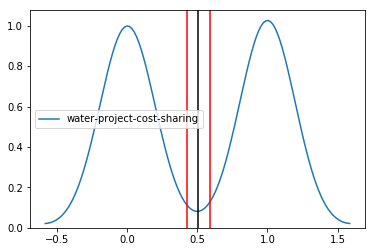

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plotting_data = repub['water-project-cost-sharing']
sns.kdeplot(plotting_data)

CI = confidence_int(plotting_data, 0.95)

plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k')

#CHI SQUARED DATA SETUP
##This is my portfolio project dataset (coral reef bleaching)

In [7]:
reefs = pd.read_csv('http://www.zernach.com/wp-content/uploads/2019/10/CoralBleaching.csv')

reefs['BLEACHING_SEVERITY'].value_counts()

No Bleaching        1477
Low                 1429
Severity Unknown    1201
HIGH                1172
Medium               911
Name: BLEACHING_SEVERITY, dtype: int64

In [8]:
reefs['YEAR'].value_counts()

1998    2054
2002     824
2005     668
2006     298
2004     297
2003     257
2001     213
2010     205
2009     188
1999     177
2000     170
2008     140
2007     124
1994      97
1987      86
2011      63
1983      48
1992      46
1997      44
2012      40
1995      27
1996      21
1982      20
1991      13
1986      12
1993      11
1980      11
1990      11
1979       6
1989       4
1985       3
1988       2
1984       2
1969       2
1981       2
1973       1
1977       1
1963       1
1976       1
Name: YEAR, dtype: int64

In [9]:
crosstab_table = pd.crosstab(reefs['BLEACHING_SEVERITY'], reefs['YEAR'], normalize='columns')
refined_table = crosstab_table.drop(columns=[1963, 1969, 1973, 1976, 1977, 1979,
                                           1980, 1981, 1982, 1983, 1984, 1985,
                                           1986, 1987, 1988, 1989, 1990, 1991,
                                           1992, 1993, 1994, 1995, 1996, 1997,
                                           2011, 2012])
refined_table = refined_table.drop(index = ['Severity Unknown'])
refined_table

YEAR,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
BLEACHING_SEVERITY,,,,,,,,,,,,,
HIGH,0.335930,0.022599,0.164706,0.046948,0.177184,0.019455,0.040404,0.112275,0.161074,0.161290,0.050000,0.159574,0.053659
Low,0.163096,0.632768,0.347059,0.342723,0.298544,0.311284,0.202020,0.401198,0.325503,0.088710,0.092857,0.053191,0.034146
Medium,0.184031,0.084746,0.135294,0.042254,0.131068,0.031128,0.151515,0.261976,0.265101,0.016129,0.028571,0.026596,0.034146
No Bleaching,0.303311,0.028249,0.017647,0.037559,0.341019,0.023346,0.020202,0.166168,0.137584,0.241935,0.407143,0.521277,0.414634


In [10]:
crosstab_table2 = pd.crosstab(reefs['BLEACHING_SEVERITY'], reefs['YEAR'])
refined_table2 = crosstab_table2.drop(columns=[1963, 1969, 1973, 1976, 1977, 1979,
                                           1980, 1981, 1982, 1983, 1984, 1985,
                                           1986, 1987, 1988, 1989, 1990, 1991,
                                           1992, 1993, 1994, 1995, 1996, 1997, 2011, 2012])
refined_table2 = refined_table2.drop(index = ['Severity Unknown'])
refined_table2

YEAR,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
BLEACHING_SEVERITY,,,,,,,,,,,,,
HIGH,690,4,28,10,146,5,12,75,48,20,7,30,11
Low,335,112,59,73,246,80,60,268,97,11,13,10,7
Medium,378,15,23,9,108,8,45,175,79,2,4,5,7
No Bleaching,623,5,3,8,281,6,6,111,41,30,57,98,85


In [11]:
highcount = refined_table.iloc[0][:].values
print(highcount)

lowcount = refined_table.iloc[1][:].values
print(lowcount)

mediumcount = refined_table.iloc[2][:].values
print(mediumcount)

zerocount = refined_table.iloc[3][:].values
print(zerocount)

[0.33592989 0.02259887 0.16470588 0.04694836 0.17718447 0.01945525
 0.04040404 0.11227545 0.16107383 0.16129032 0.05       0.15957447
 0.05365854]
[0.1630964  0.63276836 0.34705882 0.342723   0.29854369 0.31128405
 0.2020202  0.4011976  0.32550336 0.08870968 0.09285714 0.05319149
 0.03414634]
[0.18403116 0.08474576 0.13529412 0.04225352 0.13106796 0.0311284
 0.15151515 0.26197605 0.26510067 0.01612903 0.02857143 0.02659574
 0.03414634]
[0.30331061 0.02824859 0.01764706 0.03755869 0.34101942 0.0233463
 0.02020202 0.16616766 0.13758389 0.24193548 0.40714286 0.5212766
 0.41463415]


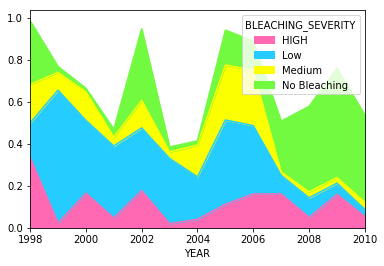

In [12]:
my_colors = ['#ff69B4', '#24CCFF', '#FBFF00', '#72FA41']
refined_table.T.plot(kind='area',stacked=True, color = my_colors)

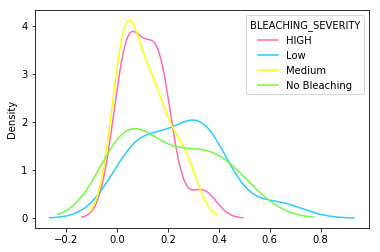

In [13]:
refined_table.T.plot(kind='density',stacked=True, color = my_colors)

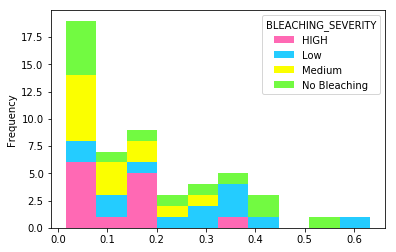

In [14]:
refined_table.T.plot(kind='hist',stacked=True, color = my_colors)

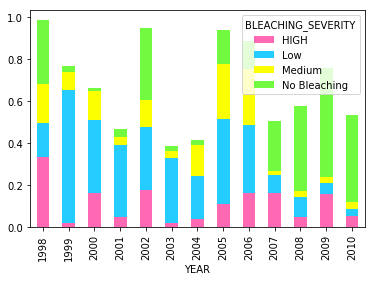

In [15]:
refined_table.T.plot(kind='bar',stacked=True, color = my_colors)

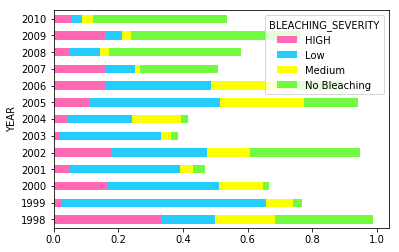

In [16]:
refined_table.T.plot(kind='barh',stacked=True, color = my_colors)

In [17]:
refined_table.shape

(4, 13)

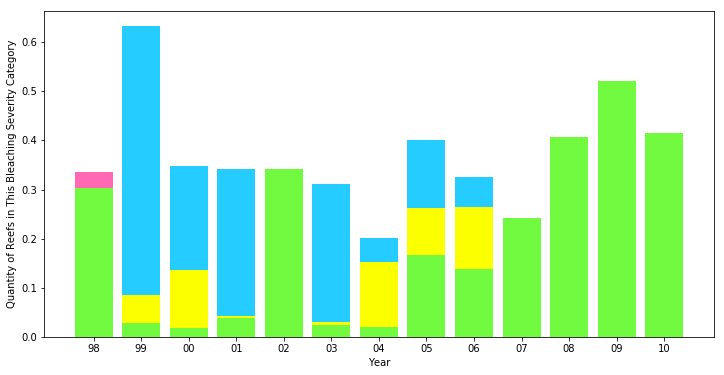

In [18]:
plt.figure(figsize = (12, 6))

x_label_categories = ['98', '99', '00', '01', '02', '03', '04', '05',
              '06', '07', '08', '09', '10']

high_bleach = plt.bar(x_label_categories, highcount, color = '#FF69B4')
low_bleach = plt.bar(x_label_categories, lowcount, color = '#24CCFF')
medium_bleach = plt.bar(x_label_categories, mediumcount, color = '#FBFF00')
zero_bleach = plt.bar(x_label_categories, zerocount, color = '#72FA41')

plt.xlabel('Year')
plt.ylabel('Quantity of Reefs in This Bleaching Severity Category')
plt.show()

In [33]:
row_sums = refined_table2.iloc[:, 12].values
col_sums = refined_table2.iloc[3, :].values
total_list = refined_table2.iloc[:, :].values

print(row_sums)
print(col_sums)
print(total_list)

[11  7  7 85]
[623   5   3   8 281   6   6 111  41  30  57  98  85]
[[690   4  28  10 146   5  12  75  48  20   7  30  11]
 [335 112  59  73 246  80  60 268  97  11  13  10   7]
 [378  15  23   9 108   8  45 175  79   2   4   5   7]
 [623   5   3   8 281   6   6 111  41  30  57  98  85]]


In [0]:
observed = np.array(total_list)

In [35]:
total_observations = 0
for value1 in range(0, 4):
  for value2 in range(0,13):
    total_observations += total_list[value1][value2]

total_observations

4669

In [36]:
expected = []
for i in range(0, len(row_sums)):
  expected_row = []
  for column_sum in col_sums:
    expected_value = column_sum * row_sums[i] / total_observations
    expected_row.append(expected_value)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
expected

(4, 13)


array([[1.46776612e+00, 1.17798244e-02, 7.06789462e-03, 1.88477190e-02,
        6.62026130e-01, 1.41357892e-02, 1.41357892e-02, 2.61512101e-01,
        9.65945599e-02, 7.06789462e-02, 1.34289998e-01, 2.30884558e-01,
        2.00257014e-01],
       [9.34032984e-01, 7.49625187e-03, 4.49775112e-03, 1.19940030e-02,
        4.21289355e-01, 8.99550225e-03, 8.99550225e-03, 1.66416792e-01,
        6.14692654e-02, 4.49775112e-02, 8.54572714e-02, 1.46926537e-01,
        1.27436282e-01],
       [9.34032984e-01, 7.49625187e-03, 4.49775112e-03, 1.19940030e-02,
        4.21289355e-01, 8.99550225e-03, 8.99550225e-03, 1.66416792e-01,
        6.14692654e-02, 4.49775112e-02, 8.54572714e-02, 1.46926537e-01,
        1.27436282e-01],
       [1.13418291e+01, 9.10259156e-02, 5.46155494e-02, 1.45641465e-01,
        5.11565646e+00, 1.09231099e-01, 1.09231099e-01, 2.02077533e+00,
        7.46412508e-01, 5.46155494e-01, 1.03769544e+00, 1.78410795e+00,
        1.54744057e+00]])

In [37]:
chi_squared = (((observed-expected)**2)/(expected)).sum()
print(chi_squared)

6318199.668931416


#CHI SQUARED (SCIPY)

In [24]:
stats.chi2_contingency(observed)

(1281.7331976875266,
 7.092687099257169e-246,
 36,
 array([[471.2435211 ,  31.63332619,  26.2835725 ,  23.25979867,
         181.65902763,  23.02720069,  28.60955237, 146.30413365,
          61.63846648,  14.65367316,  18.84043692,  33.2615121 ,
          25.58577854],
        [594.91240094,  39.9348897 ,  33.18119512,  29.36388948,
         229.33197687,  29.07025059,  36.11758407, 184.69886485,
          77.81430713,  18.49925037,  23.78475048,  41.99036196,
          32.30027843],
        [372.30841722,  24.99207539,  20.76547441,  18.37652602,
         143.52066824,  18.19276076,  22.60312701, 115.58834868,
          48.69779396,  11.57721139,  14.88498608,  26.27843221,
          20.21417862],
        [587.53566074,  39.43970872,  32.76975798,  28.99978582,
         226.48832726,  28.70978796,  35.66973656, 182.40865282,
          76.84943243,  18.26986507,  23.48982652,  41.46969372,
          31.8997644 ]]))

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)